<img src='http://hilpisch.com/tpq_logo.png' width="300px" align="right">

# FPQ Bootcamp &mdash; Day 4

**Deep Learning with TensorFlow**

## Financial Data

In [1]:
import numpy as np
import pandas as pd
from pylab import plt
plt.style.use('seaborn')
%matplotlib inline

In [2]:
raw = pd.read_csv('http://hilpisch.com/tr_eikon_eod_data.csv',
                 index_col=0, parse_dates=True)

In [8]:
sym = 'SPY'

In [53]:
data = pd.DataFrame(raw[sym])

In [54]:
data['Returns'] = np.log(data / data.shift(1))

In [55]:
lags = 10

In [69]:
cols = []
for lag in range(1, lags + 1):
    col = 'lag_%d' % lag
    # data[col] = np.where(data['Returns'].shift(lag) > 0, 1, 0)
    data[col] = np.digitize(data['Returns'].shift(lag),
                            bins=[-0.01, 0, 0.01])
    cols.append(col)

In [70]:
data.dropna(inplace=True)

## TensorFlow

In [71]:
import tensorflow as tf

In [72]:
tf.logging.set_verbosity(tf.logging.ERROR)

In [73]:
fc = tf.contrib.layers.real_valued_column('lags', dimension=lags)

In [74]:
def get_data():
    fc = {'lags': tf.constant(data[cols].values)}
    la = tf.constant(np.where(data['Returns'] > 0, 1, 0))
    return fc, la

In [75]:
model = tf.contrib.learn.DNNClassifier(hidden_units=[100, 100],
                                       feature_columns=[fc])

In [76]:
model.fit(input_fn=get_data, steps=250)

DNNClassifier(params={'head': <tensorflow.contrib.learn.python.learn.estimators.head._BinaryLogisticHead object at 0x181d76e908>, 'hidden_units': [100, 100], 'feature_columns': (_RealValuedColumn(column_name='lags', dimension=10, default_value=None, dtype=tf.float32, normalizer=None),), 'optimizer': None, 'activation_fn': <function relu at 0x10bfdfa60>, 'dropout': None, 'gradient_clip_norm': None, 'embedding_lr_multipliers': None, 'input_layer_min_slice_size': None})

In [77]:
model.evaluate(input_fn=get_data, steps=1)

{'accuracy': 0.58701169,
 'accuracy/baseline_label_mean': 0.54743785,
 'accuracy/threshold_0.500000_mean': 0.58701169,
 'auc': 0.60872102,
 'global_step': 250,
 'labels/actual_label_mean': 0.54743785,
 'labels/prediction_mean': 0.51314598,
 'loss': 0.67796743,
 'precision/positive_threshold_0.500000_mean': 0.60834014,
 'recall/positive_threshold_0.500000_mean': 0.68952733}

In [78]:
data['Prediction'] = list(model.predict(input_fn=get_data))

In [79]:
data.head()

,SPY,Returns,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,Prediction,Strategy
Date,,,,,,,,,,,,,,
2010-01-05,113.63,0.002644,3,3,3,3,3,3,3,3,3,3,1,0.002644
2010-01-06,113.71,0.000704,2,3,3,3,3,3,3,3,3,3,1,0.000704
2010-01-07,114.19,0.004212,2,2,3,3,3,3,3,3,3,3,1,0.004212
2010-01-08,114.57,0.003322,2,2,2,3,3,3,3,3,3,3,1,0.000000
2010-01-11,114.73,0.001396,2,2,2,2,3,3,3,3,3,3,1,0.001396


In [80]:
data['Strategy'] = data['Prediction'] * data['Returns']

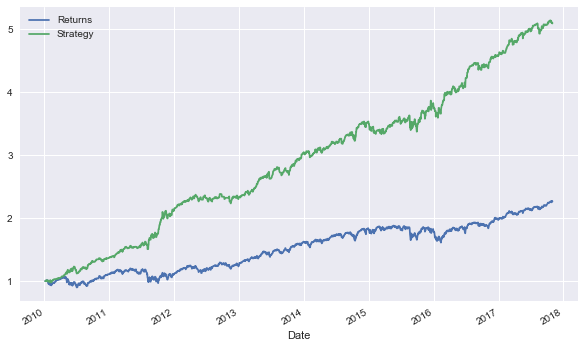

In [81]:
data[['Returns', 'Strategy']].cumsum().apply(np.exp).plot(figsize=(10, 6));

<img src='http://hilpisch.com/tpq_logo.png' width="300px" align="right">